# Step 1: Importing necessary library

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Step 2: Load dataset

In [2]:
# load the dataset into a dataframe
df = pd.read_csv('diamonds.csv')

# Step 3: Exploratory data analysis

In [3]:
# check the dataset
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# check the categories in the cut column
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

## Visualize the data and remove outliers 

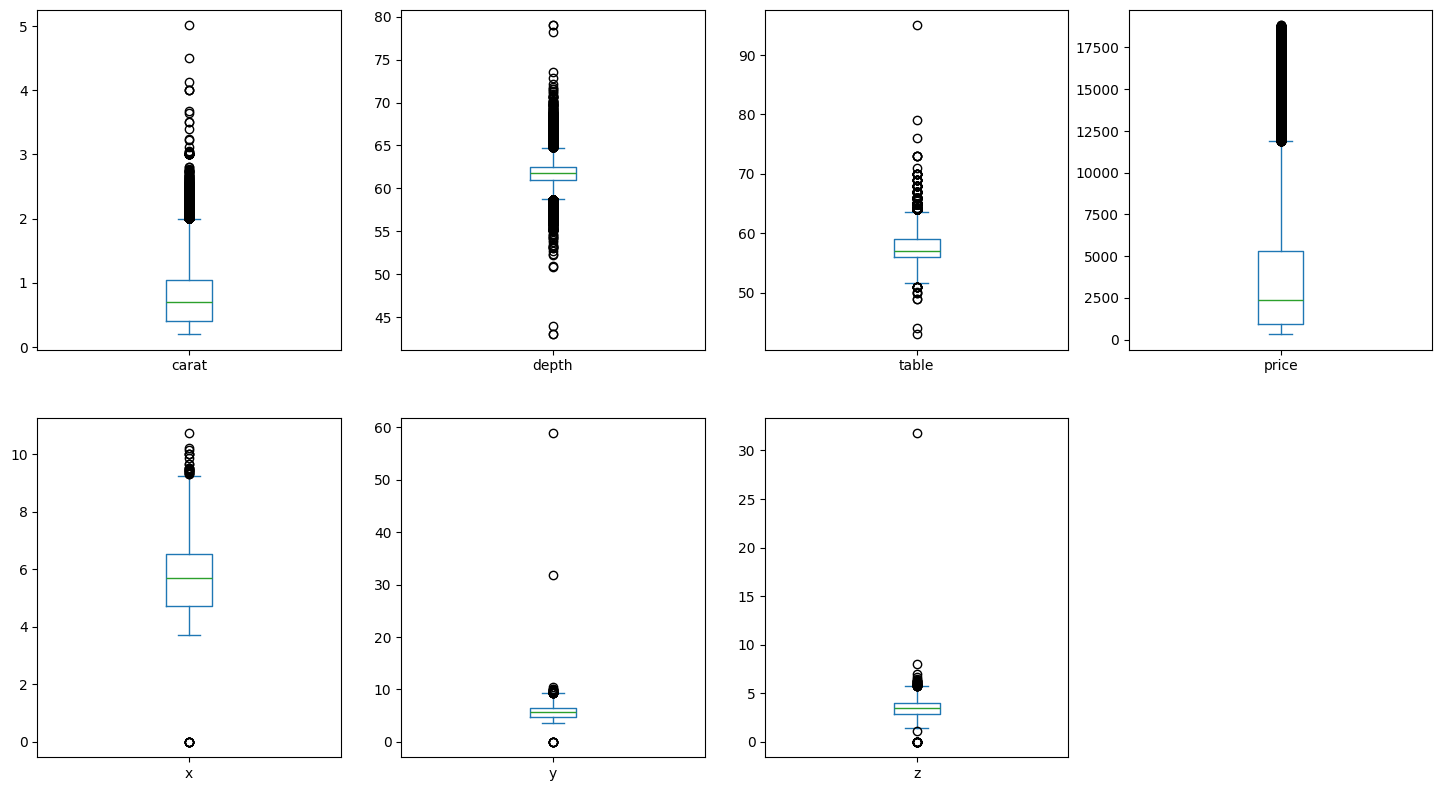

In [7]:
#plt.savefig('diamondsoutliers.png')
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))

plt.show()

In [8]:
# Use interquartile range method to remove outliers
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the numeric columns, keeping other columns like 'color' and 'clarity'
df_cleaned = remove_outliers(df, numeric_columns)

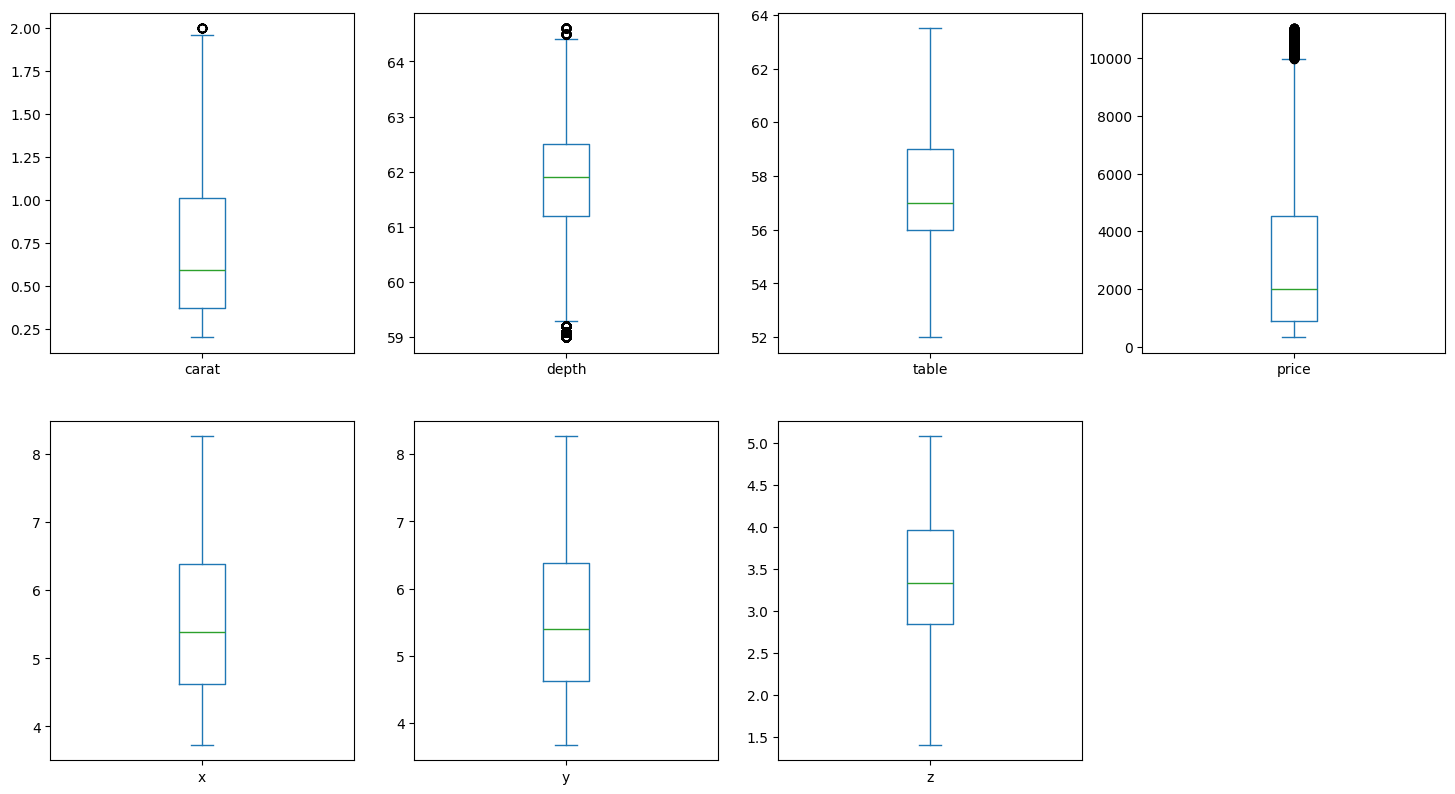

In [9]:
# check for outliers
df_cleaned.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

# Class distribution

In [10]:
# target column is 'cut'
df['cut'].value_counts(normalize=True)

cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

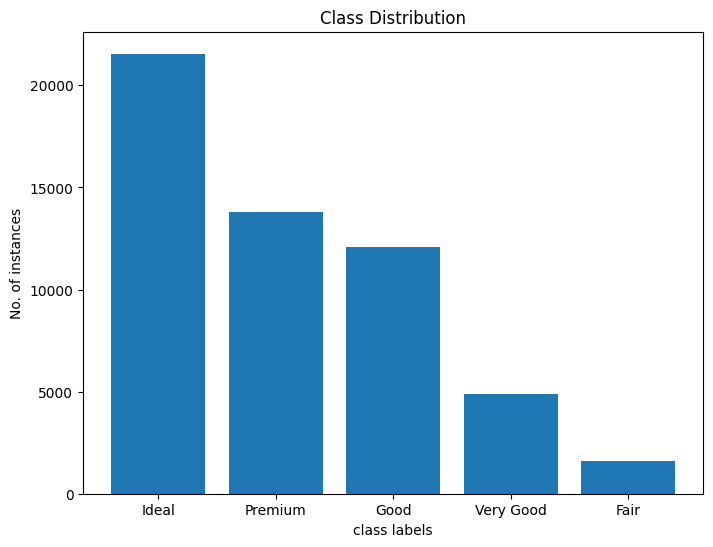

In [11]:
unique_classes = df['cut'].unique()
class_counts = df['cut'].value_counts()

plt.figure(figsize = (8,6))
plt.bar(unique_classes, class_counts)
plt.xlabel('class labels')
plt.ylabel('No. of instances')
plt.title('Class Distribution')
#plt.savefig('cutclassdistribution.png')
plt.show()

# Step 4: Data Preprocessing

In [12]:
# Label encode the target variable 'cut' 
label_encoder = LabelEncoder()  # initiialize the LabelEncoder
df_cleaned['cut_encoded'] = label_encoder.fit_transform(df_cleaned['cut'])

In [13]:
# One-hot encode the categorical features 'color' and 'clarity'
df_cleaned = pd.get_dummies(df_cleaned, columns=['color', 'clarity'], drop_first=True)

In [14]:
df_cleaned.head(10)

,carat,cut,depth,table,price,x,y,z,cut_encoded,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,2,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,3,True,...,False,False,False,False,True,False,False,False,False,False
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,3,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,1,False,...,False,False,True,False,False,True,False,False,False,False
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,4,False,...,False,False,True,False,False,False,False,False,False,True
6,0.24,Very Good,62.3,57.0,336,3.95,3.98,2.47,4,False,...,False,True,False,False,False,False,False,False,True,False
7,0.26,Very Good,61.9,55.0,337,4.07,4.11,2.53,4,False,...,True,False,False,False,True,False,False,False,False,False
9,0.23,Very Good,59.4,61.0,338,4.00,4.05,2.39,4,False,...,True,False,False,False,False,False,True,False,False,False
10,0.30,Good,64.0,55.0,339,4.25,4.28,2.73,1,False,...,False,False,True,False,True,False,False,False,False,False
11,0.23,Ideal,62.8,56.0,340,3.93,3.90,2.46,2,False,...,False,False,True,False,False,False,True,False,False,False


In [15]:
#Defining  Features and target
X = df_cleaned.drop(columns=['cut', 'cut_encoded'])  # Drop original 'cut' and target 'cut_encoded'
y = df_cleaned['cut_encoded']

In [16]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the dataset

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Perform Logistic Regression

In [18]:
# Train the multinomial logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 6: Make predictions using the model

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model

In [21]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [22]:
conf_matrix

array([[   1,   42,    7,   15,    2],
       [   6,  334,  137,   61,  179],
       [   0,    9, 3513,  192,  335],
       [   0,    0,  286, 1698,  392],
       [   0,  143,  732,  331,  892]])

In [23]:
print(f"Accuracy = {accuracy}")
print(f"Precision = {class_report}")

Accuracy = 0.6917374019555174
Precision =               precision    recall  f1-score   support

           0       0.14      0.01      0.03        67
           1       0.63      0.47      0.54       717
           2       0.75      0.87      0.81      4049
           3       0.74      0.71      0.73      2376
           4       0.50      0.43      0.46      2098

    accuracy                           0.69      9307
   macro avg       0.55      0.50      0.51      9307
weighted avg       0.68      0.69      0.68      9307



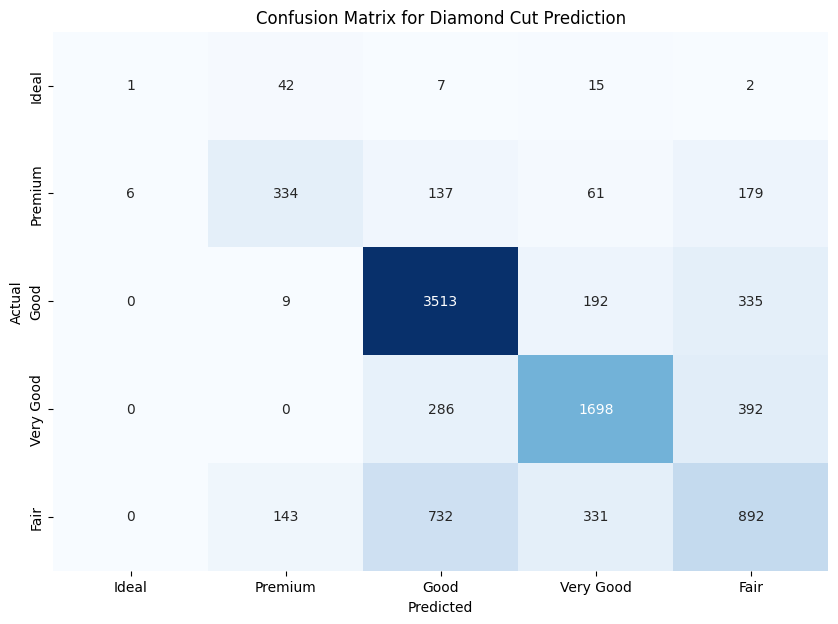

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], yticklabels=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Diamond Cut Prediction')
#plt.savefig('CMfor Diamond Cut Prediction.png')
plt.show()

## Insights

## Diagonal Elements:
These are the correctly classified instances for each class. For example, Fair was correctly predicted 1 time, Premium 334 times, Good 3513 times, Very Good 1698, and Fair 892 times.

## Off-Diagonal Elements: 
These are the misclassified instances. For example, many Premium diamonds were incorrectly classified as Fair (179 times), and many Fair  diamonds were classified as Good (732 times).

Ideal and Fair cuts are poorly predicted, with only 1 and 892 correct predictions, respectively, and many misclassifications across other categories.

Good diamonds are correctly predicted 3513 times, showing strong accuracy for this category.

There’s noticeable confusion between Premium, Very Good, and Fair, with many incorrect predictions between these classes.

## Take away
The performance of the model was poor and it needs improvement.

This can be done by refining features, applying regularization, or adjusting class weights since there is an imbalance across categories.